In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as sm

import os; import sys
sys.path.append('/home/mitch/school/mfl/src/')
import utils
import sys; sys.path.append('/home/mitch/util/python')

In [141]:
raw     = '/home/mitch/Dropbox/data/mexico_fls/raw/2005/'
processed = '/home/mitch/Dropbox/data/mexico_fls/processed2/'

figs    = '/home/mitch/school/mfl/fig/'
dicts   = '/home/mitch/school/mfl/notebooks/dicts/'

In [142]:
df = pd.read_csv(processed + 'data.csv')
df

,hhid,hhmember,weight_ind,is_hhm,age,attended_school,education,gender,income_type,income_undetailed,...,hh_has_savings_credit_institution,hh_has_savings_batch,hh_has_savings_person_not_hhm,hh_has_savings_afores,hh_has_savings_solidarity,hh_has_savings_at_house,hh_has_savings_other,hh_has_debts_12mth,hh_debts_12mth,hh_has_savings
0,1000,1,2244.0,1.0,41.0,True,Medium,Male,dk,NaN,...,False,False,False,False,False,False,False,0.0,0.0,False
1,3000,1,2244.0,1.0,45.0,False,low,Male,undetailed,6000.0,...,False,False,False,False,False,False,False,0.0,0.0,False
2,8000,1,2244.0,1.0,33.0,True,High,Male,undetailed,60000.0,...,True,False,False,False,False,False,False,1.0,15000.0,True
3,10000,1,2074.0,1.0,39.0,True,Low,Female,NaN,NaN,...,False,False,False,False,False,False,False,1.0,5000.0,False
4,11000,1,2074.0,1.0,29.0,True,Medium,Male,detailed,NaN,...,False,False,False,False,False,False,False,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,10751000,1,5539.0,1.0,39.0,True,Low,Male,undetailed,5000.0,...,False,False,False,False,False,False,False,1.0,12000.0,False
5059,10752000,1,1614.0,1.0,32.0,True,Medium,Male,undetailed,60000.0,...,False,False,False,False,False,False,False,1.0,7000.0,False
5060,10754000,1,817.0,1.0,43.0,True,Low,Male,undetailed,59000.0,...,False,False,False,False,False,False,False,1.0,1500.0,False
5061,10758000,1,839.0,1.0,27.0,True,Low,Male,undetailed,36000.0,...,False,False,False,False,False,False,False,0.0,0.0,False


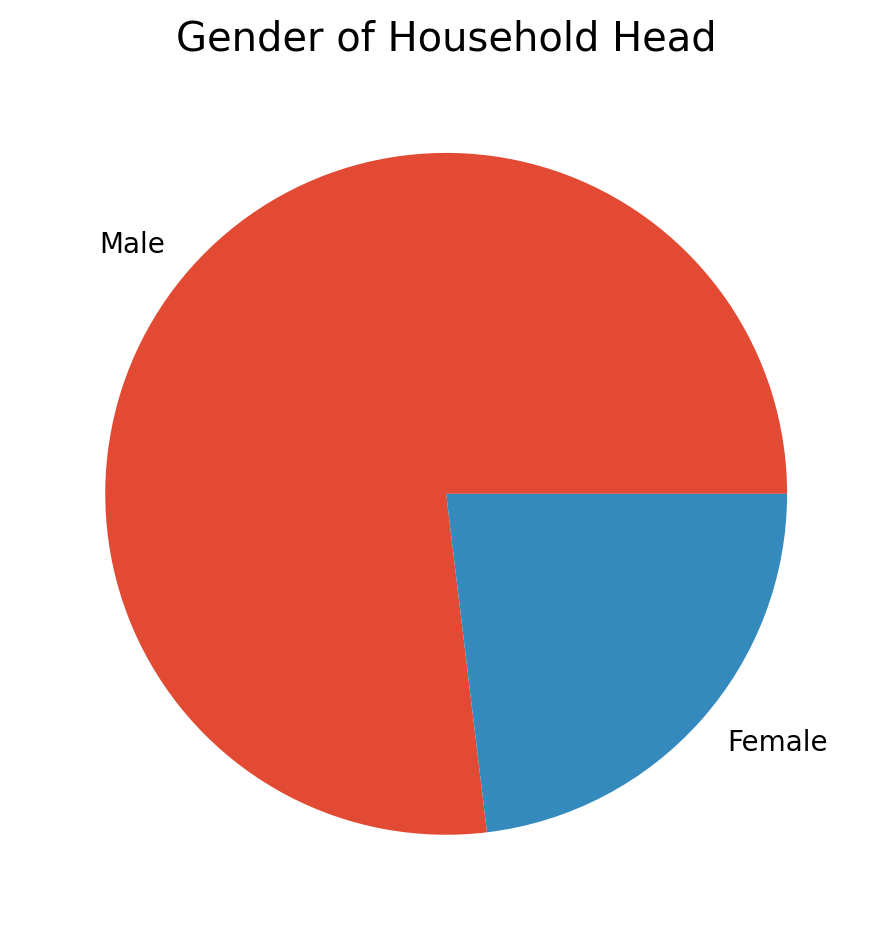

In [143]:
plt.clf()
gender = df.gender.value_counts()
plt.pie(gender, labels=[x.title() for x in gender.index])
plt.title('Gender of Household Head')
plt.show()

# Education

<ipython-input-144-42112dbe4838>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'Medium', 'High'])


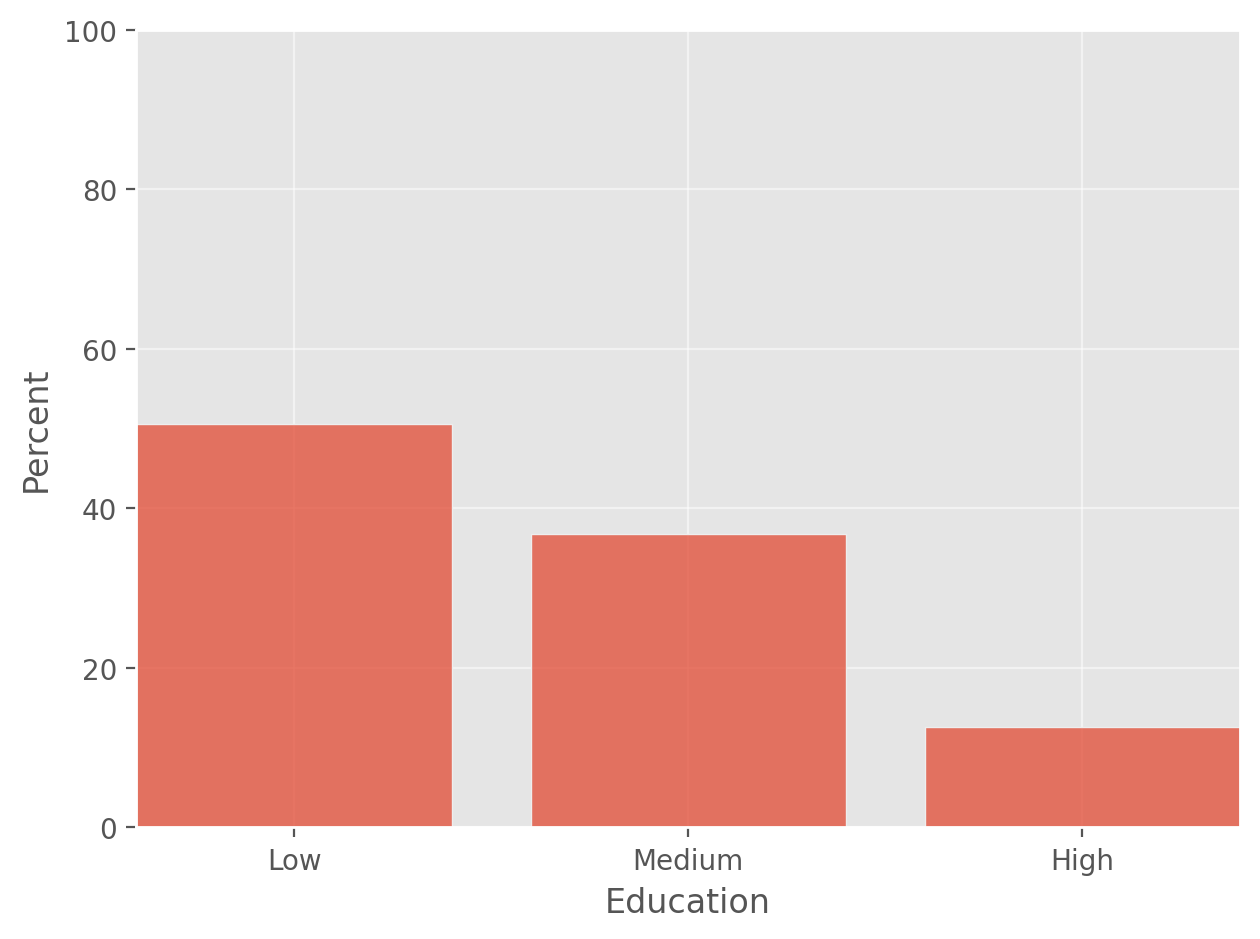

In [144]:
df['education'] = pd.Categorical(df['education'], ['Low', 'Medium', 'High'])
plt.clf()
ax = sns.histplot(df, x='education',
                  weights='weight_hh',
                  shrink=0.8,
                  stat='percent'
                  )
ax.set_xlabel('Education')
ax.set_xticklabels(['Low', 'Medium', 'High'])

ax.set_ylabel('Percent')
ax.set_ylim(0, 100)

plt.show()

<ipython-input-145-fafe7d775bf4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Low', 'Medium', 'High'])


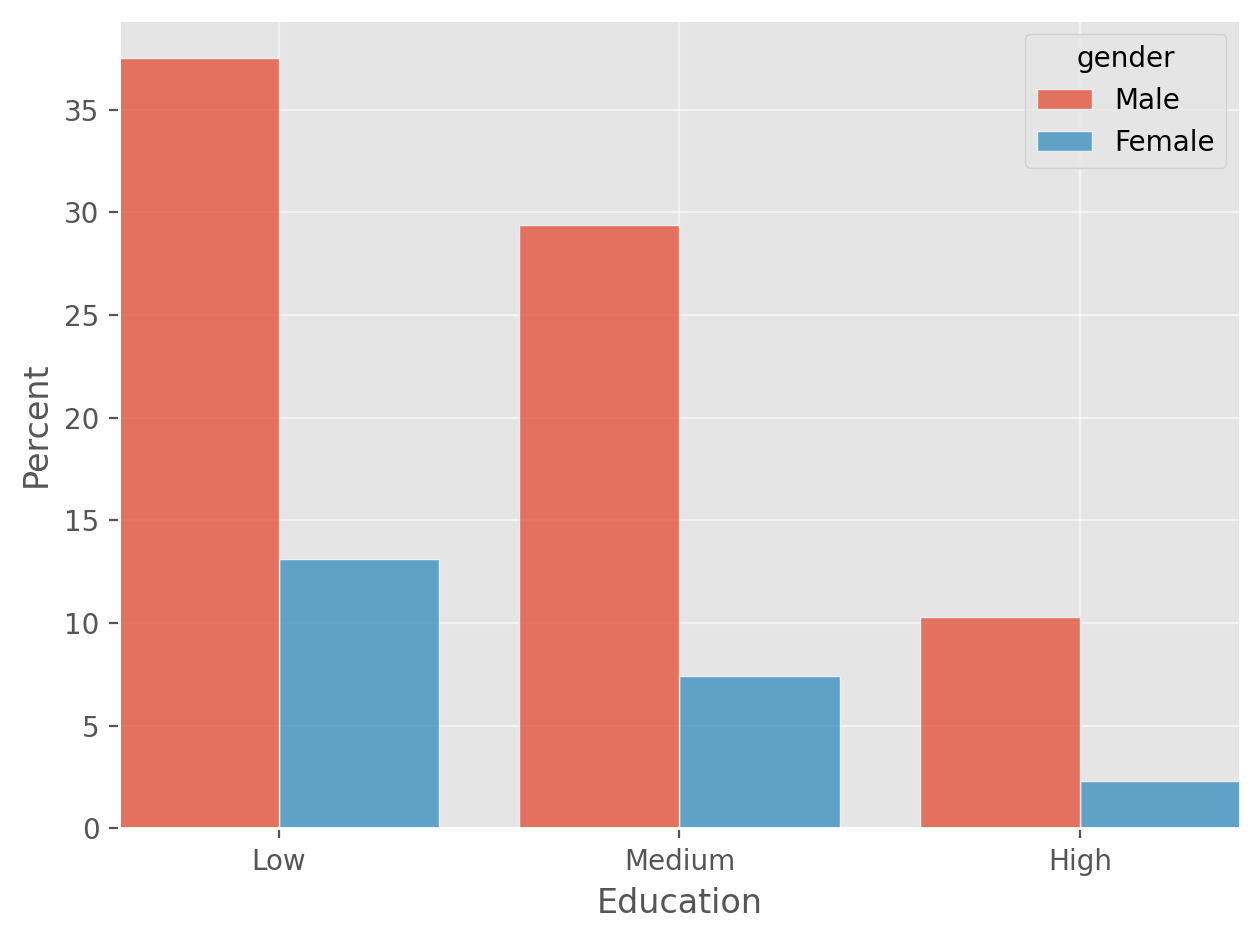

In [145]:
plt.clf()
ax = sns.histplot(df, x='education',
                  weights='weight_hh',
                  shrink=0.8,
                  hue='gender', multiple='dodge', 
                  stat='percent',
                  label = 'Gender'
                  )
plt.xlabel('Education')
plt.ylabel('Percent')
ax.set_xticklabels(['Low', 'Medium', 'High'])
plt.show()

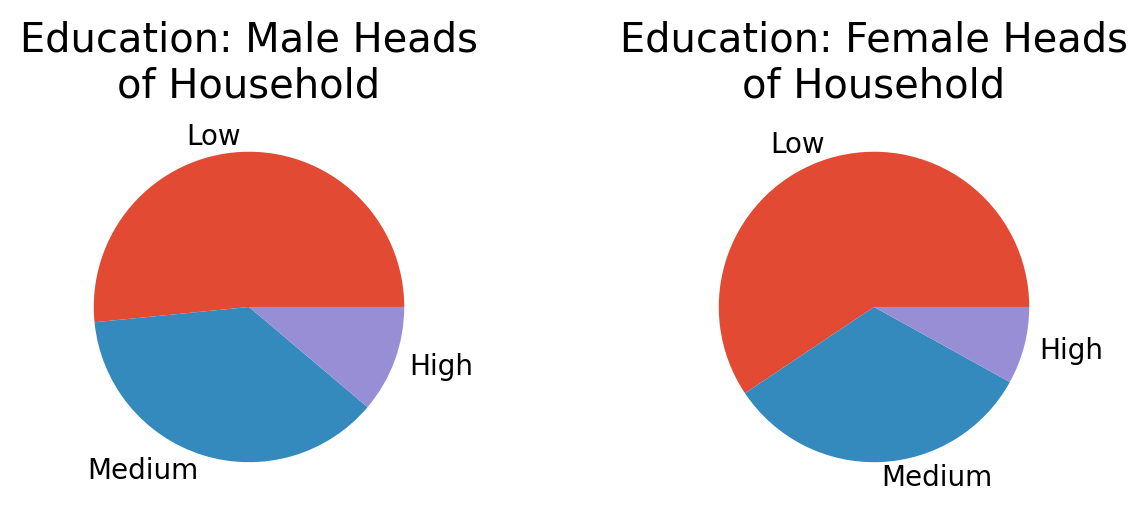

In [146]:

plt.clf()

plt.subplot(221)
male = df.query("gender == 'Male'").education.value_counts()
plt.pie(male, labels=[x.title() for x in male.index])
plt.title('Education: Male Heads\nof Household')

plt.subplot(222)
female = df.query("gender == 'Female'").education.value_counts()
plt.pie(female, labels=[x.title() for x in female.index])
plt.title('Education: Female Heads\nof Household')

plt.show()

# Location

In [147]:
percent = 100 * df.groupby('state')['weight_hh'].apply(np.sum) / df.weight_hh.sum()
percent = percent.sort_values(ascending=False)
percent

state
State of Mexico        12.069957
Veravruz               10.267100
Jalisco                 9.426697
Michoacan               8.486809
Oaxaca                  7.580478
Morelos                 7.246227
Puebla                  6.987309
Nuevo Leon              5.585715
Guanajuato              5.579919
Federal District        5.481976
Yucatan                 4.668900
Coahuila                4.616131
Durango                 3.363125
Sinaloa                 3.259754
Sonora                  2.764533
Baja California Sur     2.615370
Name: weight_hh, dtype: float64

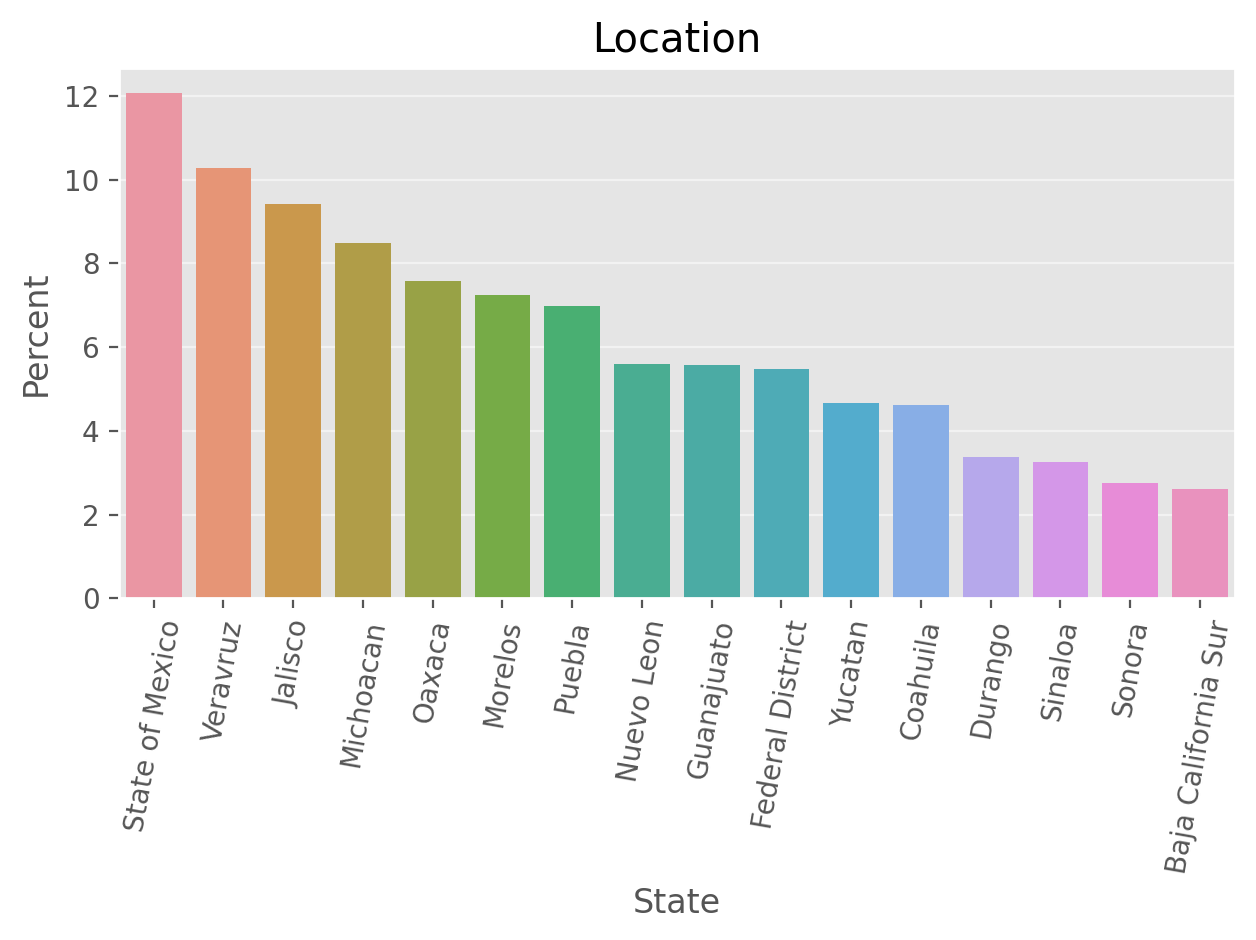

In [148]:
plt.clf()
sns.barplot(df, x=percent.index, y=percent.values)
plt.xticks(rotation=80)
plt.xlabel('State')
plt.ylabel('Percent')
plt.title('Location')
plt.show()

# Income

<Figure size 1280x960 with 0 Axes>

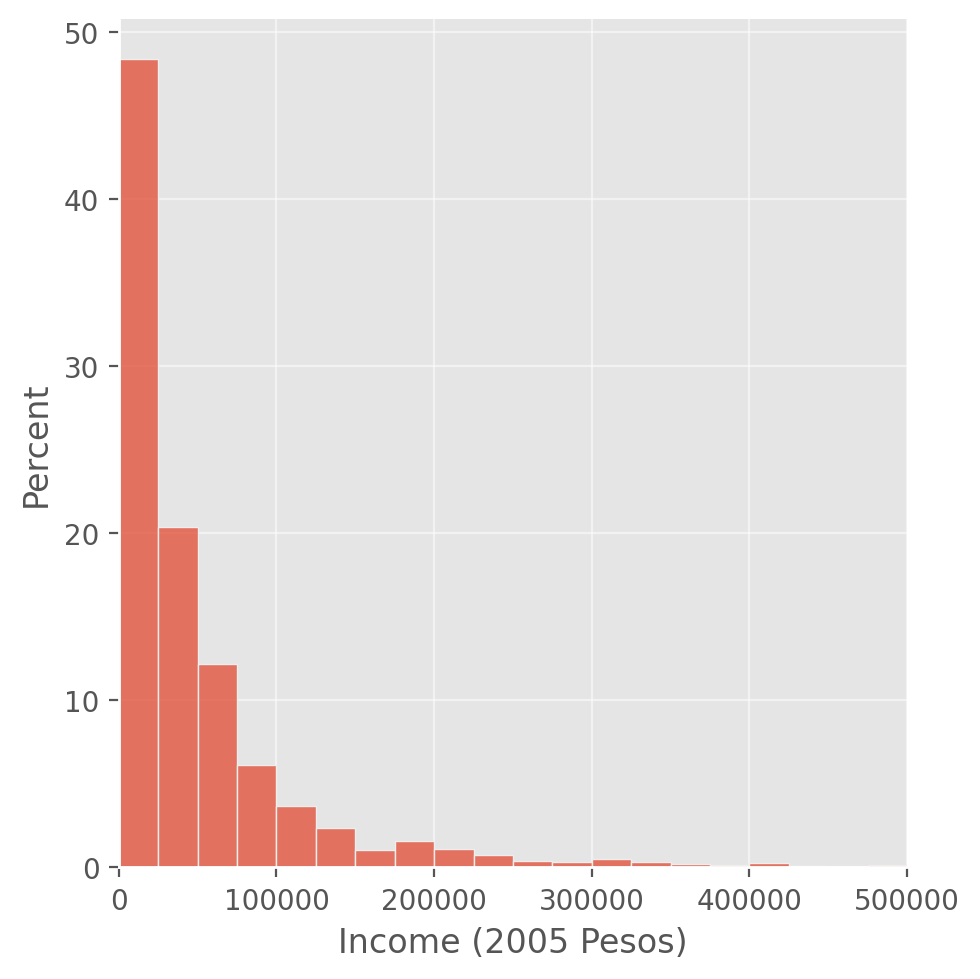

In [149]:
plt.clf()
sns.displot(df,
            x='income',
            weights='weight_hh',
            stat='percent',
            bins=20
            )
plt.xlabel('Income (2005 Pesos)')
plt.show()

<Figure size 1280x960 with 0 Axes>

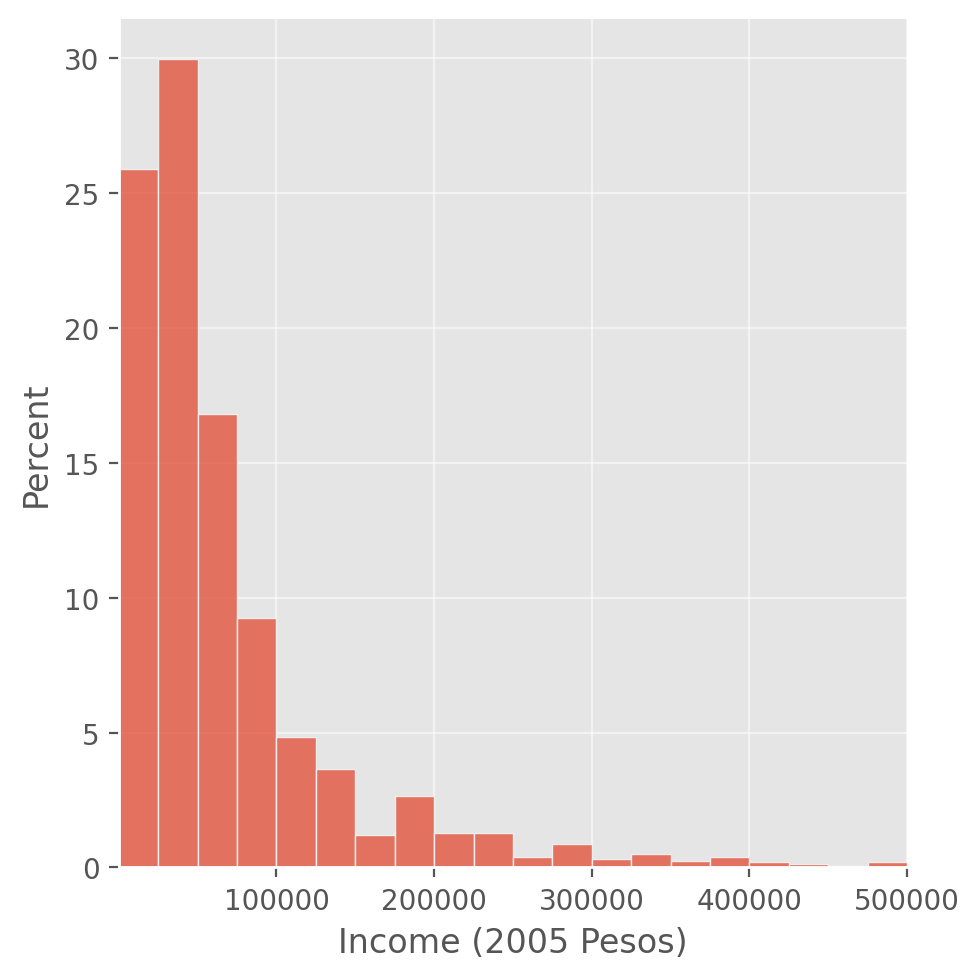

In [150]:
plt.clf()
sns.displot(df.query('income > 0'),
            x='income',
            weights='weight_hh',
            stat='percent', 
            bins=20)
plt.xlabel('Income (2005 Pesos)')
plt.show()

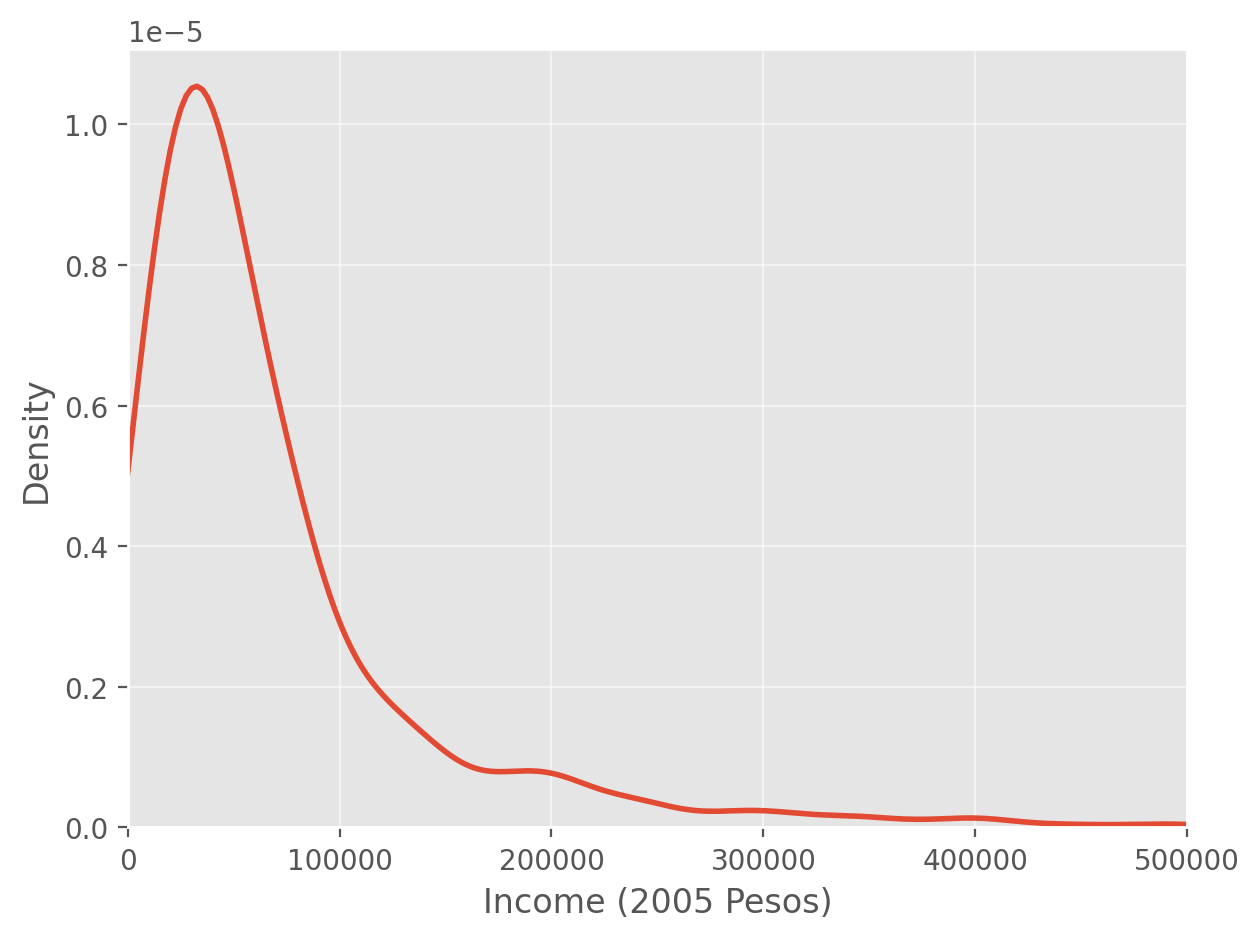

In [151]:
plt.clf()
sns.kdeplot(df.query('income > 0'),
            x='income',
            weights='weight_ind', 
            clip=(0.00, df.income.max()))
plt.xlabel('Income (2005 Pesos)')
plt.show()

In [152]:
hh_savings = [x for x in df.columns if 'hh_has_savings' in x]

def weighted_mean(df, x, weight='weight_hh'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    
hh_savings_mean = pd.DataFrame(
    index = hh_savings
)
hh_savings_mean['mean'] = [100 * weighted_mean(df, x) for x in hh_savings]
hh_savings_mean.sort_values('mean', ascending=False)

,mean
hh_has_savings,14.620122
hh_has_savings_bank,8.737721
hh_has_savings_credit_institution,3.176151
hh_has_savings_at_house,1.557710
hh_has_savings_other,0.784421
hh_has_savings_cooperative,0.450041
hh_has_savings_afores,0.159812
hh_has_savings_batch,0.156085
hh_has_savings_solidarity,0.099687
hh_has_savings_person_not_hhm,0.063583


In [153]:
ind_savings = [x for x in df.columns if 'has_savings' in x]

def weighted_mean(df, x, weight='weight_ind'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    

ind_savings_mean = pd.DataFrame(
    index = ind_savings
)
ind_savings_mean['mean'] = [100 * weighted_mean(df, x) for x in ind_savings]
ind_savings_mean.sort_values('mean', ascending=False)

,mean
has_savings,22.038016
hh_has_savings,14.675707
has_savings_bank,10.312561
hh_has_savings_bank,8.797487
has_savings_savingsbank,5.395042
has_savings_house,5.035684
hh_has_savings_credit_institution,3.177295
hh_has_savings_at_house,1.551974
has_savings_coop,1.266201
has_savings_none,0.928737


In [154]:
own = [x for x in df.columns if 'own' in x]

def weighted_mean(df, x, weight='weight_ind'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    

own_mean = pd.DataFrame(
    index = own
)
own_mean['mean'] = [100 * weighted_mean(df, x) for x in own]
own_mean = own_mean.sort_values('mean', ascending=False)

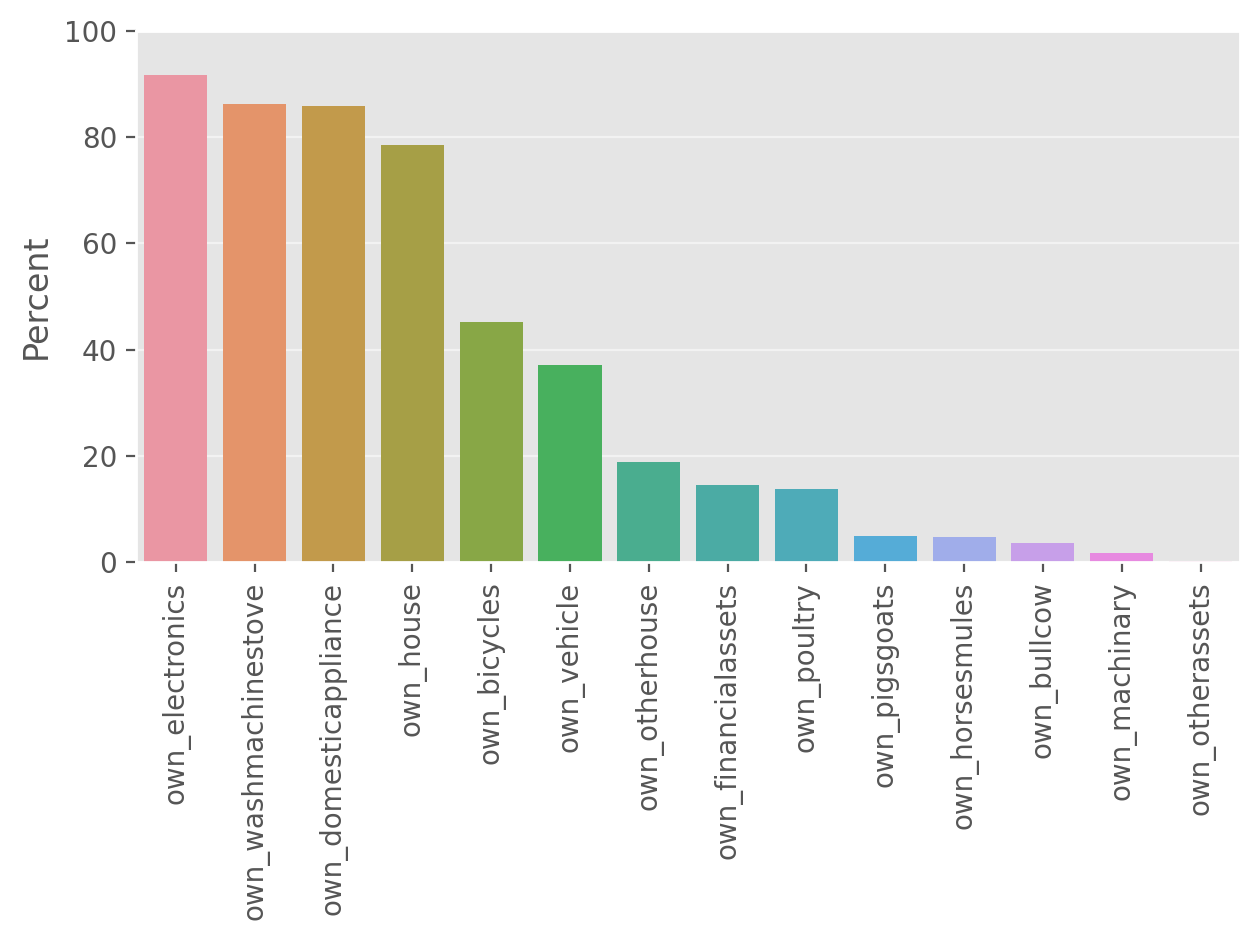

In [155]:
own_mean
plt.clf()
ax = sns.barplot(own_mean, x=own_mean.index, y='mean')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

ax.set_ylim(0, 100)
ax.set_ylabel('Percent')

plt.show()

/home/mitch/anaconda3/envs/main/lib/python3.9/site-packages/seaborn/distributions.py:407: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  and estimate_kws["bins"] == "auto"


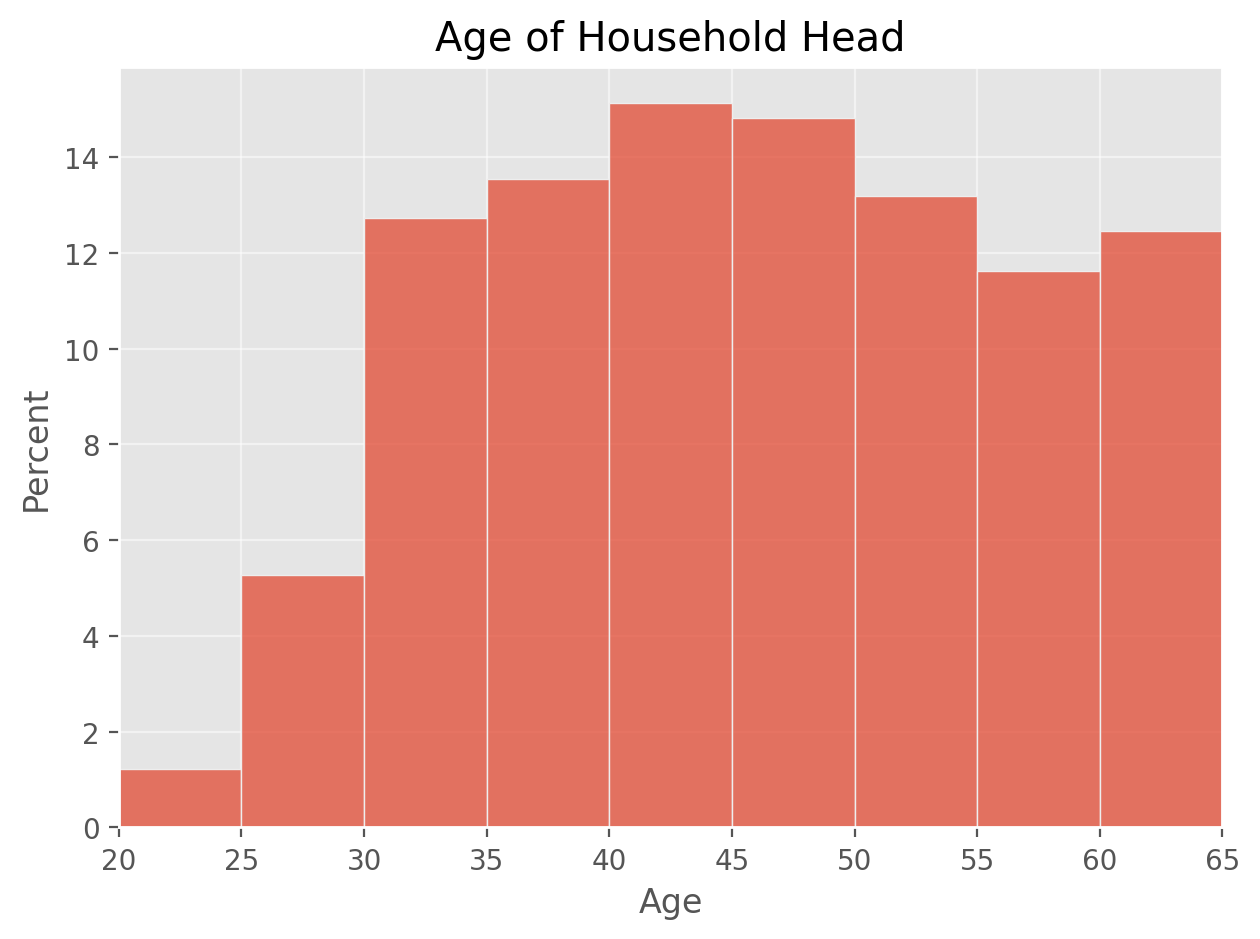

In [156]:
agebins = np.arange(20, 70, 5)
plt.clf()
ax = sns.histplot(df, x = 'age', weights='weight_hh', 
             bins=agebins,
             stat='percent')
ax.set_xlabel('Age')
plt.title('Age of Household Head')
plt.show()

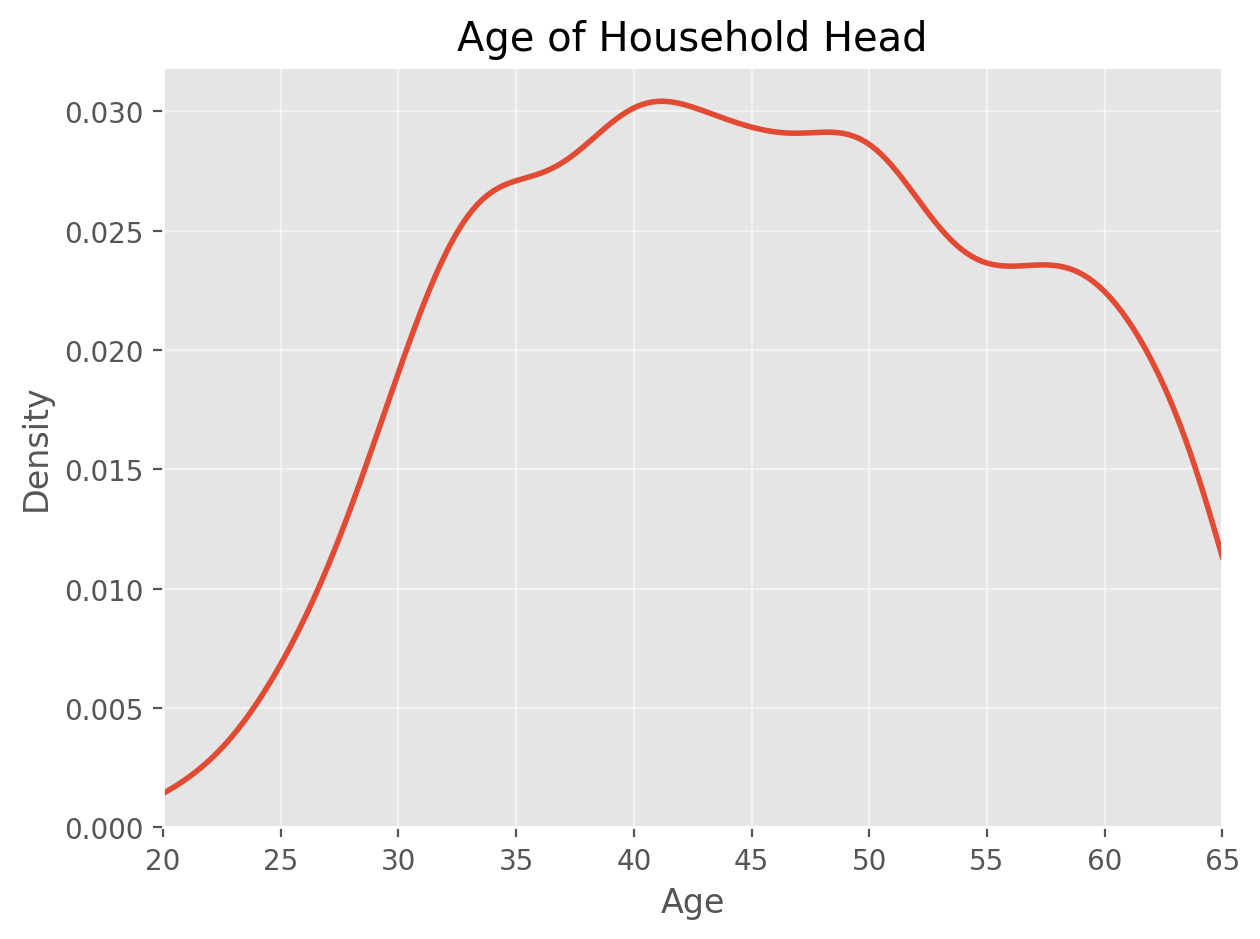

In [157]:
plt.clf()
ax = sns.kdeplot(df, x = 'age', weights='weight_hh',
                 clip = (df.age.min(), df.age.max()),
            linestyle='-')
ax.set_xlim(df.age.min(), df.age.max())
ax.set_xlabel('Age')
plt.title('Age of Household Head')
plt.show()

In [158]:
age_bins = np.arange(20, 70, 5)
df['age_bin'] = pd.cut(df.age, age_bins)
df.age_bin.value_counts()

(40, 45]    801
(45, 50]    747
(35, 40]    707
(50, 55]    662
(55, 60]    635
(30, 35]    612
(60, 65]    494
(25, 30]    305
(20, 25]     93
Name: age_bin, dtype: int64

In [159]:
df.gender

0         Male
1         Male
2         Male
3       Female
4         Male
         ...  
5058      Male
5059      Male
5060      Male
5061      Male
5062      Male
Name: gender, Length: 5063, dtype: object

In [160]:
ax = sns.histplot(df, x='education',
                  weights='weight_hh',
                  shrink=0.8,
                  stat='percent'
                  )

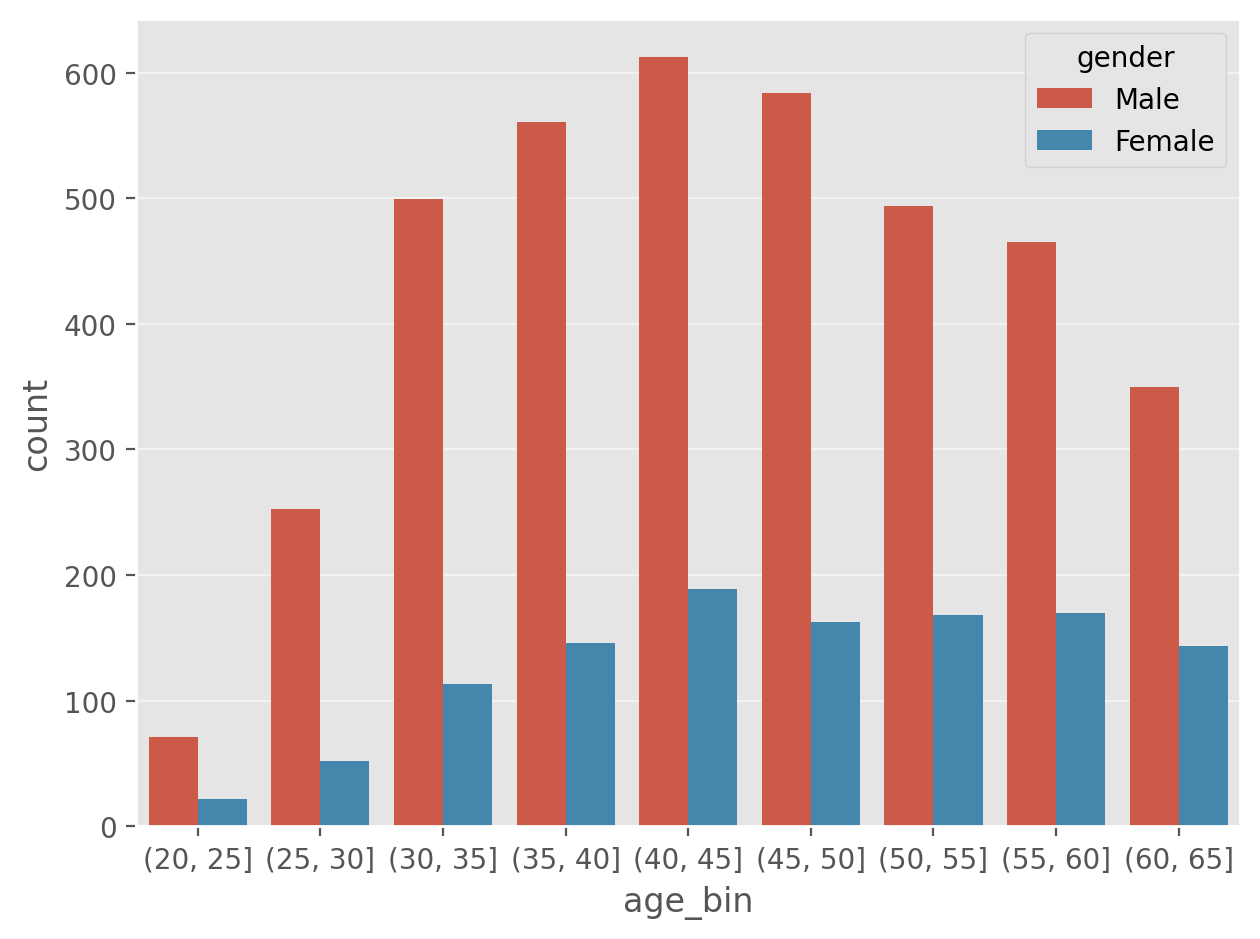

In [161]:
plt.clf()
sns.countplot(df, x='age_bin', hue='gender')
plt.show()

<Figure size 1280x960 with 0 Axes>

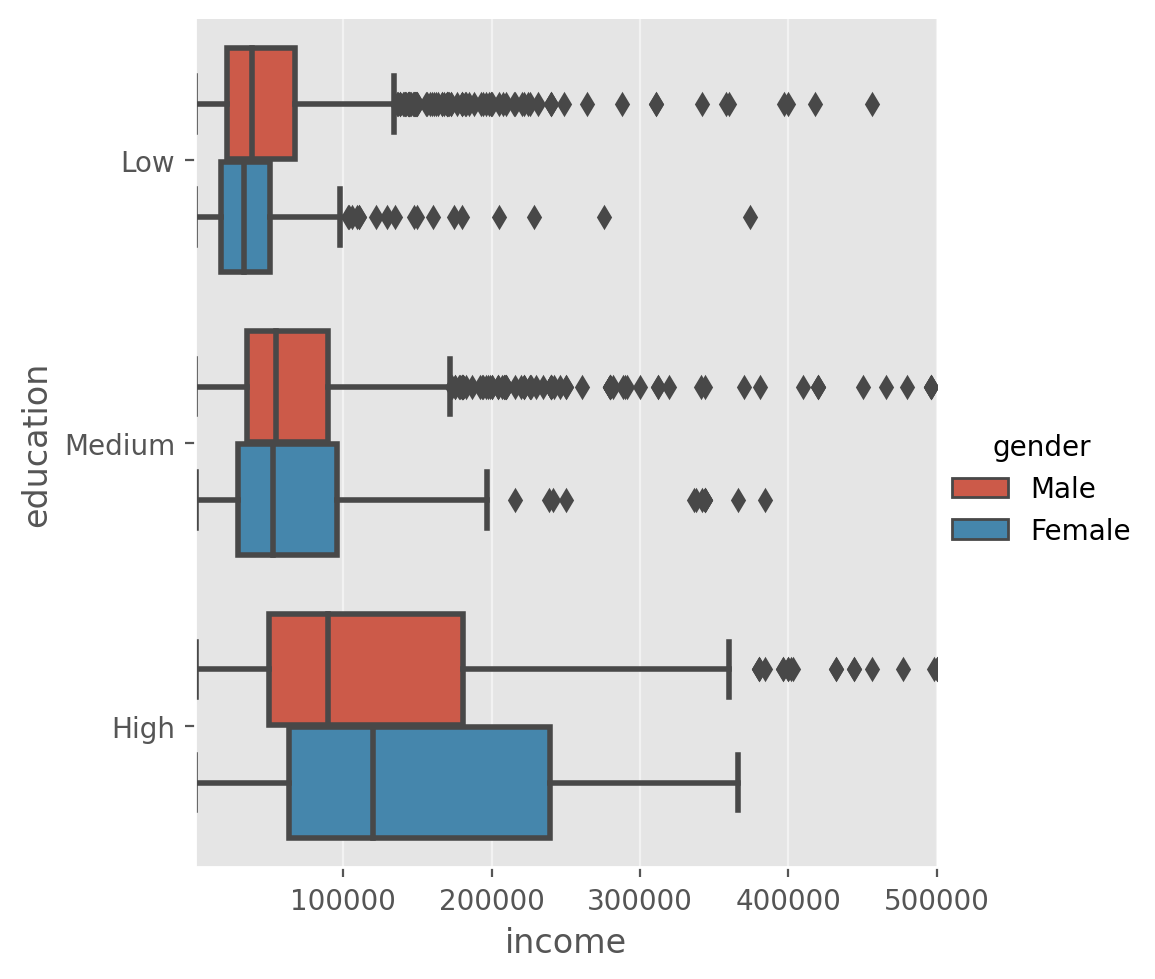

In [175]:
plt.clf()
sns.catplot(df.query('income > 0'), x='income', y='education', hue='gender', kind='box', orient='h')
plt.show()

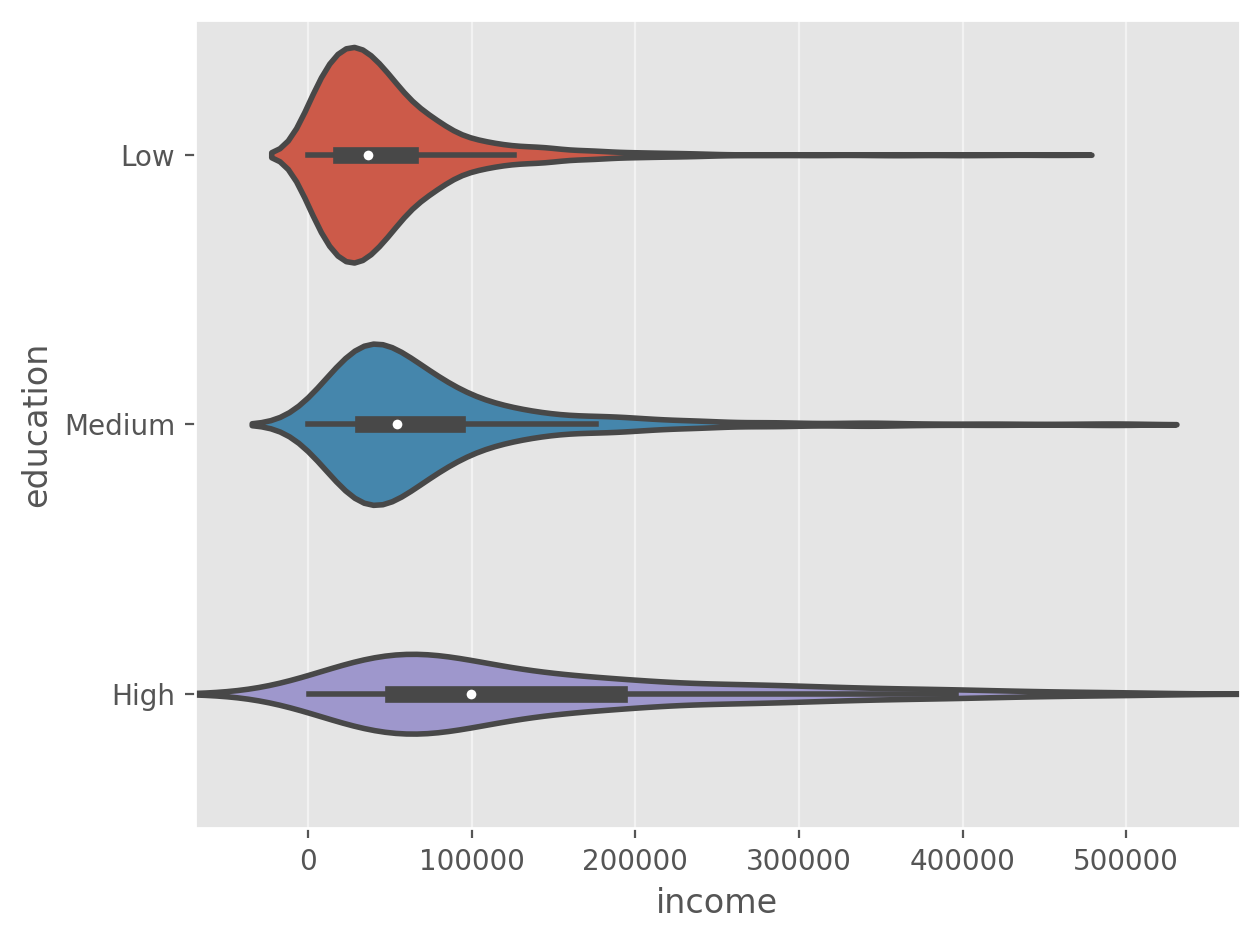

In [177]:
plt.clf()
sns.violinplot(df.query('income > 0'), x='income', y='education', kind='box', orient='h')
plt.show()

<Figure size 1280x960 with 0 Axes>

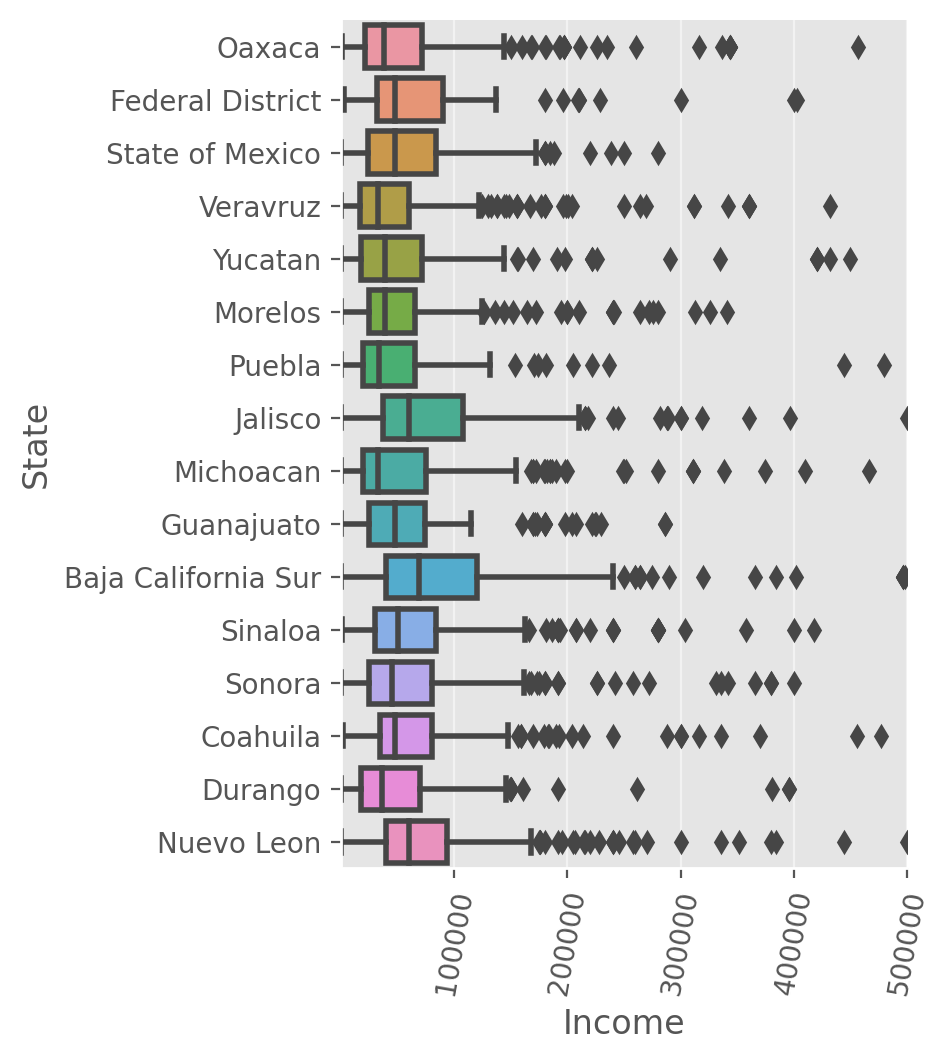

In [174]:
plt.clf()
sns.catplot(df.query('income > 0'), x='income', y='state', kind='box', orient='h')
plt.xticks(rotation=80)

plt.ylabel('State')
plt.xlabel('Income')
plt.show()

In [163]:
count =  df.groupby(['age_bin'])['education'].value_counts()
weighted = df.groupby(['age_bin', 'education'])['weight_hh'].sum()

In [164]:
(count * weighted).reset_index()

,age_bin,education,0
0,"(20, 25]",High,278800.0
1,"(20, 25]",Low,2273481.0
2,"(20, 25]",Medium,9870137.0
3,"(25, 30]",High,2082213.0
4,"(25, 30]",Low,44954560.0
5,"(25, 30]",Medium,88628384.0
6,"(30, 35]",High,11409045.0
7,"(30, 35]",Low,138400560.0
8,"(30, 35]",Medium,411437596.0
9,"(35, 40]",High,24447280.0


In [165]:
df.groupby(['age_bin'])['education'].value_counts()

age_bin   education
(20, 25]  Medium        53
          Low           27
          High          10
(25, 30]  Medium       157
          Low          112
          High          23
(30, 35]  Medium       346
          Low          201
          High          53
(35, 40]  Medium       340
          Low          251
          High          80
(40, 45]  Low          354
          Medium       288
          High          99
(45, 50]  Low          388
          Medium       195
          High          90
(50, 55]  Low          401
          Medium       125
          High          53
(55, 60]  Low          374
          Medium        79
          High          46
(60, 65]  Low          284
          Medium        44
          High          17
Name: education, dtype: int64

In [166]:
df.groupby(['age_bin', 'education'])['weight_hh'].sum()

age_bin   education
(20, 25]  Low            84203.0
          Medium        186229.0
          High           27880.0
(25, 30]  Low           401380.0
          Medium        564512.0
          High           90531.0
(30, 35]  Low           688560.0
          Medium       1189126.0
          High          215265.0
(35, 40]  Low           837717.0
          Medium       1034178.0
          High          305591.0
(40, 45]  Low          1054164.0
          Medium        842233.0
          High          417042.0
(45, 50]  Low          1204233.0
          Medium        633625.0
          High          305865.0
(50, 55]  Low          1157485.0
          Medium        426545.0
          High          206920.0
(55, 60]  Low          1103435.0
          Medium        271713.0
          High          176252.0
(60, 65]  Low           814969.0
          Medium        186371.0
          High           82028.0
Name: weight_hh, dtype: float64

In [167]:
df.groupby('age_bin')['weight_hh'].sum()

age_bin
(20, 25]     303669.0
(25, 30]    1097807.0
(30, 35]    2149590.0
(35, 40]    2307585.0
(40, 45]    2505519.0
(45, 50]    2384576.0
(50, 55]    2003852.0
(55, 60]    2029091.0
(60, 65]    1524083.0
Name: weight_hh, dtype: float64